Multi-output Regression using Scikit-learn
Mechanical Properties of Steels


# Step 1: Downloading and unzipping the dataset


In [ ]:
# Download dataset
!wget https://prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com/hxpvf9gjz9-1.zip

--2024-09-22 16:05:57--  https://prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com/hxpvf9gjz9-1.zip
Resolving prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com (prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com)... 3.5.70.154, 52.218.116.42, 3.5.68.254, ...
Connecting to prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com (prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com)|3.5.70.154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16725 (16K) [application/zip]
Saving to: ‘hxpvf9gjz9-1.zip.6’

hxpvf9gjz9-1.zip.6  100%[===================>]  16.33K  --.-KB/s    in 0s      

2024-09-22 16:05:58 (61.9 MB/s) - ‘hxpvf9gjz9-1.zip.6’ saved [16725/16725]



In [ ]:
#unzip the dataset
!unzip -q /content/hxpvf9gjz9-1.zip

replace Mechanical Properties of Steels/Atomic Features/Atomic Features-NIMS Fatigue.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace Mechanical Properties of Steels/Original Data/NIMS Fatigue.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y


# Step 2: Reading dataset using Pandas
Now, we are using the pandas library to read this excel file and store its contents in a dataframe named ‘df’.
Once the data is loaded into df, we display the first 5 rows of the dataframe using the head() method.


In [ ]:
import pandas as pd
df = pd.read_csv('/content/Mechanical Properties of Steels/Original Data/NIMS Fatigue.csv')
#df = pd.read_excel('/content/4vnf8rh5gm-1/data.xlsx')
df.head()

,NT,QT,TT,C,Si,Mn,P,S,Ni,Cr,Cu,Mo,RR,dA,dB,dC,Fatigue,Tensile,Fracture,Hardness
0,865,865,550,0.35,0.21,0.77,0.021,0.022,0.01,0.01,0.02,0.0,825,0.05,0.03,0.00,397,736,1482,235
1,865,865,550,0.35,0.30,0.74,0.017,0.024,0.01,0.10,0.01,0.0,1270,0.07,0.02,0.00,419,736,1492,249
2,865,865,550,0.34,0.26,0.74,0.012,0.015,0.01,0.02,0.01,0.0,1740,0.08,0.00,0.00,401,690,1484,239
3,865,865,550,0.36,0.26,0.70,0.009,0.023,0.08,0.12,0.09,0.0,610,0.07,0.00,0.03,394,790,1440,261
4,865,865,550,0.33,0.21,0.75,0.031,0.019,0.01,0.03,0.02,0.0,825,0.08,0.00,0.00,426,720,1435,230


In [ ]:
df1 = df.drop(['RR','dA','dB','dC'], axis=1)
df3 = df.drop(['RR','dA','dB','dC'], axis=1)

In [ ]:
df1.head()

,NT,QT,TT,C,Si,Mn,P,S,Ni,Cr,Cu,Mo,Fatigue,Tensile,Fracture,Hardness
0,865,865,550,0.35,0.21,0.77,0.021,0.022,0.01,0.01,0.02,0.0,397,736,1482,235
1,865,865,550,0.35,0.30,0.74,0.017,0.024,0.01,0.10,0.01,0.0,419,736,1492,249
2,865,865,550,0.34,0.26,0.74,0.012,0.015,0.01,0.02,0.01,0.0,401,690,1484,239
3,865,865,550,0.36,0.26,0.70,0.009,0.023,0.08,0.12,0.09,0.0,394,790,1440,261
4,865,865,550,0.33,0.21,0.75,0.031,0.019,0.01,0.03,0.02,0.0,426,720,1435,230


In [ ]:
df1.describe()

,NT,QT,TT,C,Si,Mn,P,S,Ni,Cr,Cu,Mo,Fatigue,Tensile,Fracture,Hardness
count,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000
mean,865.583333,848.250000,605.000000,0.407333,0.258250,0.848583,0.015858,0.014450,0.548167,0.556083,0.063500,0.065667,491.558333,907.997222,1643.897222,290.588889
std,17.370893,9.859387,42.386995,0.061332,0.034024,0.294244,0.004848,0.006065,0.898877,0.419033,0.044814,0.089387,69.548620,136.160799,134.556790,42.042529
min,825.000000,825.000000,550.000000,0.280000,0.160000,0.370000,0.007000,0.003000,0.010000,0.010000,0.010000,0.000000,325.000000,613.000000,1358.000000,195.000000
25%,865.000000,845.000000,550.000000,0.367500,0.240000,0.710000,0.012000,0.009000,0.020000,0.107500,0.020000,0.000000,442.000000,813.500000,1531.000000,260.750000
50%,870.000000,845.000000,600.000000,0.400000,0.260000,0.750000,0.016000,0.015000,0.050000,0.725000,0.050000,0.000000,493.000000,900.000000,1664.500000,288.500000
75%,870.000000,855.000000,650.000000,0.430000,0.280000,0.802500,0.019000,0.019000,0.585000,0.980000,0.092500,0.170000,543.000000,1005.000000,1753.500000,319.000000
max,900.000000,865.000000,680.000000,0.570000,0.350000,1.600000,0.031000,0.030000,2.780000,1.120000,0.220000,0.240000,643.000000,1206.000000,1931.000000,380.000000


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   NT        360 non-null    int64  
 1   QT        360 non-null    int64  
 2   TT        360 non-null    int64  
 3   C         360 non-null    float64
 4   Si        360 non-null    float64
 5   Mn        360 non-null    float64
 6   P         360 non-null    float64
 7   S         360 non-null    float64
 8   Ni        360 non-null    float64
 9   Cr        360 non-null    float64
 10  Cu        360 non-null    float64
 11  Mo        360 non-null    float64
 12  Fatigue   360 non-null    int64  
 13  Tensile   360 non-null    int64  
 14  Fracture  360 non-null    int64  
 15  Hardness  360 non-null    int64  
dtypes: float64(9), int64(7)
memory usage: 45.1 KB


In [ ]:
df1.tail()

,NT,QT,TT,C,Si,Mn,P,S,Ni,Cr,Cu,Mo,Fatigue,Tensile,Fracture,Hardness
355,870,845,680,0.47,0.19,0.76,0.013,0.013,1.67,0.71,0.06,0.0,476,878,1653,281
356,870,845,680,0.44,0.25,0.74,0.010,0.009,1.74,0.79,0.09,0.0,482,895,1625,287
357,870,845,680,0.45,0.16,0.79,0.009,0.016,1.65,0.73,0.05,0.0,477,860,1680,281
358,870,845,680,0.48,0.20,0.70,0.010,0.016,1.66,0.73,0.11,0.0,491,881,1668,286
359,870,845,680,0.49,0.29,0.69,0.014,0.011,1.80,0.77,0.07,0.0,479,909,1633,290


#Step 3: Exploratory data analysis (EDA)


<Axes: >

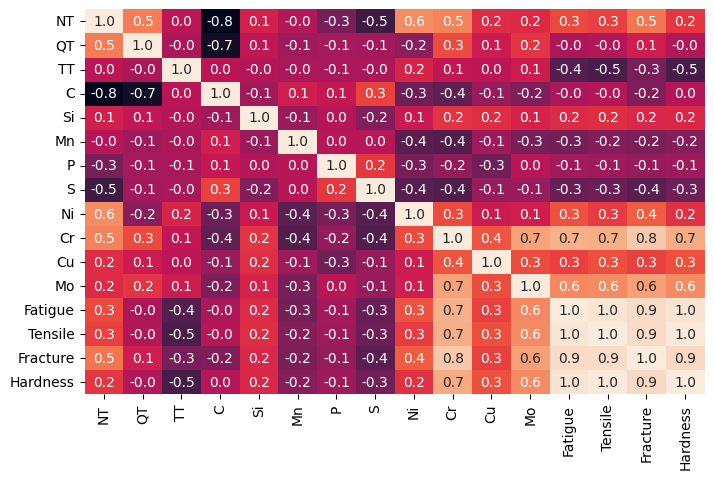

In [ ]:
# Finding correlation between features and plotting them
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (8,5))
sns.heatmap(df1.corr(), cbar = False, annot = True, fmt=".1f")

In [ ]:
# installing package
!pip install pandas-profiling

In [ ]:
'''
!pip install ydata-profiling
!pip install pydantic-settings

#importing library
from ydata_profiling import ProfileReport
#defining the library
profile = ProfileReport(df1)
# exporting your report as a html file
profile.to_file(output_file='report.html')
'''

"\n!pip install ydata-profiling\n!pip install pydantic-settings\n\n#importing library\nfrom ydata_profiling import ProfileReport\n#defining the library\nprofile = ProfileReport(df1)\n# exporting your report as a html file\nprofile.to_file(output_file='report.html')\n"

## (ii) Plotting histograms to visualize data distribution


In [ ]:
'''
import matplotlib.pyplot as plt

# Define the number of rows and columns you want
n_rows=3
n_cols=4

# Create the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)
fig.set_size_inches(10, 5)
for i, column in enumerate(df.iloc[:, :-4].columns):
    sns.histplot(df[column], ax=axes[i//n_cols, i % n_cols], kde=True)
plt.tight_layout()
'''

'\nimport matplotlib.pyplot as plt\n\n# Define the number of rows and columns you want\nn_rows=3\nn_cols=4\n\n# Create the subplots\nfig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)\nfig.set_size_inches(10, 5)\nfor i, column in enumerate(df.iloc[:, :-4].columns):\n    sns.histplot(df[column], ax=axes[i//n_cols, i % n_cols], kde=True)\nplt.tight_layout()\n'

In [ ]:
dfx = df.drop(['RR','dA','dB','dC','Fatigue',	'Tensile',	'Fracture',	'Hardness'], axis=1)

In [ ]:
dfx.head()

,NT,QT,TT,C,Si,Mn,P,S,Ni,Cr,Cu,Mo
0,865,865,550,0.35,0.21,0.77,0.021,0.022,0.01,0.01,0.02,0.0
1,865,865,550,0.35,0.30,0.74,0.017,0.024,0.01,0.10,0.01,0.0
2,865,865,550,0.34,0.26,0.74,0.012,0.015,0.01,0.02,0.01,0.0
3,865,865,550,0.36,0.26,0.70,0.009,0.023,0.08,0.12,0.09,0.0
4,865,865,550,0.33,0.21,0.75,0.031,0.019,0.01,0.03,0.02,0.0


## (iii) Spliting the dataset

With random_state=42 , we get the same train and test sets across different executions, but in this time, the train and test sets are different from the previous case with random_state=0 . The train and test sets directly affect the model's performance score.

In [ ]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X = dfx.iloc[:,:]
y = df1.iloc[:,-4:]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

## (iv) Finding unique values in each feature to understand the variance:

In [ ]:
for col in X_train.columns:
    print(f"{col} : ", X_train[f'{col}'].unique())


NT :  [900 870 825 865 845]
QT :  [845 825 855 865]
TT :  [600 680 650 550 630 580]
C :  [0.32 0.41 0.53 0.4  0.38 0.33 0.49 0.37 0.42 0.39 0.34 0.45 0.43 0.36
 0.35 0.54 0.47 0.3  0.44 0.55 0.57 0.31 0.28 0.46 0.48 0.56 0.52]
Si :  [0.3  0.29 0.24 0.25 0.26 0.21 0.23 0.28 0.27 0.19 0.32 0.35 0.22 0.31
 0.33 0.34 0.2  0.16]
Mn :  [0.52 0.74 1.51 0.83 0.87 0.71 0.75 0.8  0.82 0.73 0.77 0.72 0.79 0.49
 1.5  1.59 1.34 0.7  0.76 1.48 0.69 1.47 0.58 0.78 0.53 1.57 1.58 1.36
 0.81 0.56 0.63 0.68 0.65 1.49 1.46 1.38 1.56 0.37 0.86 1.52 0.54 1.6 ]
P :  [0.013 0.02  0.019 0.011 0.016 0.031 0.027 0.012 0.015 0.01  0.009 0.022
 0.017 0.021 0.024 0.018 0.023 0.026 0.014 0.008 0.007]
S :  [0.009 0.01  0.008 0.026 0.015 0.017 0.019 0.023 0.012 0.013 0.011 0.006
 0.005 0.03  0.02  0.022 0.007 0.016 0.018 0.021 0.004 0.028 0.025 0.024
 0.014 0.003]
Ni :  [2.67 1.84 0.04 0.02 0.07 1.8  0.01 1.76 1.67 0.05 0.12 2.66 0.06 0.03
 1.92 0.13 0.11 2.65 1.82 2.7  1.88 1.66 1.74 2.63 0.24 1.75 1.62 1.63
 0.1  0

# (v) Plot of each feature with Mech Ppties

## Plot of each feature with Fatigue
Exploring the relationships between each feature in the dataframe and the output variables Fatigue, Tensile, Fracture, and Hardness'.


In [ ]:
# Create the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)
fig.set_size_inches(10, 5)
for i, column in enumerate(df1.iloc[:,:-4].columns):
    sns.regplot(x = df[column], y = df['Fatigue'],ax=axes[i//n_cols,i%n_cols], scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.tight_layout()

'\n#y1 Fatigue\n#y2 Tensile\n#y3 Fracture\n#y4 Hardness\n\n# Create the subplots\nfig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)\nfig.set_size_inches(10, 5)\nfor i, column in enumerate(df1.iloc[:,:-4].columns):\n    sns.regplot(x = df[column], y = df[\'Fatigue\'],ax=axes[i//n_cols,i%n_cols], scatter_kws={"color": "green"}, line_kws={"color": "red"})\nplt.tight_layout()\n'

## (vi) Plot of each feature with Tensile Strength


In [ ]:
# Create the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)
fig.set_size_inches(10, 5)

for i, column in enumerate(df.iloc[:,:-4].columns):
    sns.regplot(x = df1[column], y = df1['Tensile'],ax=axes[i//n_cols,i%n_cols], scatter_kws={"color": "black" , 'cmap':'jet'}, line_kws={"color": "red"})
plt.tight_layout()

'\n#y1 Fatigue\n#y2 Tensile\n#y3 Fracture\n#y4 Hardness\n# Create the subplots\nfig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)\nfig.set_size_inches(10, 5)\n\nfor i, column in enumerate(df.iloc[:,:-4].columns):\n    sns.regplot(x = df1[column], y = df1[\'Tensile\'],ax=axes[i//n_cols,i%n_cols], scatter_kws={"color": "black" , \'cmap\':\'jet\'}, line_kws={"color": "red"})\nplt.tight_layout()\n'

## Plot of each feature with Fracture

In [ ]:
# Create the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)
fig.set_size_inches(10, 5)

for i, column in enumerate(df.iloc[:,:-4].columns):
    sns.regplot(x = df1[column], y = df1['Fracture'],ax=axes[i//n_cols,i%n_cols], scatter_kws={"color": "blue" , 'cmap':'jet'}, line_kws={"color": "red"})
plt.tight_layout()

'\n#y1 Fatigue\n#y2 Tensile\n#y3 Fracture\n#y4 Hardness\n# Create the subplots\nfig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)\nfig.set_size_inches(10, 5)\n\nfor i, column in enumerate(df.iloc[:,:-4].columns):\n    sns.regplot(x = df1[column], y = df1[\'Fracture\'],ax=axes[i//n_cols,i%n_cols], scatter_kws={"color": "blue" , \'cmap\':\'jet\'}, line_kws={"color": "red"})\nplt.tight_layout()\n'

## Plot of each feature with Hardness

In [ ]:
# Create the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)
fig.set_size_inches(10, 5)

for i, column in enumerate(df.iloc[:,:-4].columns):
    sns.regplot(x = df1[column], y = df1['Hardness'],ax=axes[i//n_cols,i%n_cols], scatter_kws={"color": "yellow" , 'cmap':'jet'}, line_kws={"color": "red"})
plt.tight_layout()

'\n\n#y1 Fatigue\n#y2 Tensile\n#y3 Fracture\n#y4 Hardness\n# Create the subplots\nfig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)\nfig.set_size_inches(10, 5)\n\nfor i, column in enumerate(df.iloc[:,:-4].columns):\n    sns.regplot(x = df1[column], y = df1[\'Hardness\'],ax=axes[i//n_cols,i%n_cols], scatter_kws={"color": "yellow" , \'cmap\':\'jet\'}, line_kws={"color": "red"})\nplt.tight_layout()\n'

#Step 4: Compute summary of predictions



In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

def printPredictions(y_true,y_pred, count):
  print(f"Predictions: ")
  print(y_true.assign(
      Y1_pred = y_pred[:,0],
      Y2_pred = y_pred[:,1],
      Y3_pred = y_pred[:,2],
      Y4_pred = y_pred[:,3]
  ).head(count).to_markdown(index = False))

def showResults(y_true, y_pred, count = 5):
  print("R2 score: ",r2_score(y_true,y_pred))
  print("Mean squared error: ",mean_squared_error(y_true,y_pred))
  print("Mean absolute error: ",mean_absolute_error(y_true,y_pred))
  printPredictions(y_true,y_pred, count)

#Step 5: Splitting data into training and test set.
80% is used for training, and 20%for testing. The random_state parameter ensures reproducibility.


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(dfx.iloc[:,:], df1.iloc[:,-4:], test_size = 0.2, random_state = 42)
print(X_train.shape,X_test.shape)
print(y_train.shape, y_test.shape)

(288, 12) (72, 12)
(288, 4) (72, 4)


# Step 6: Creating multi-output regression model
The multi-output regression using Scikit-learn can be done in three ways:


In [ ]:
#(i) Linear regression
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X_train,y_train)
showResults(y_test,linear.predict(X_test))

R2 score:  0.9093066850021414
Mean squared error:  851.8949188561838
Mean absolute error:  20.68112506625454
Predictions: 
|   Fatigue |   Tensile |   Fracture |   Hardness |   Y1_pred |   Y2_pred |   Y3_pred |   Y4_pred |
|----------:|----------:|-----------:|-----------:|----------:|----------:|----------:|----------:|
|       404 |       815 |       1529 |        263 |   457.393 |   865.267 |   1577.65 |   277.206 |
|       465 |       882 |       1554 |        281 |   476.519 |   890.575 |   1554.31 |   287.693 |
|       523 |       928 |       1692 |        292 |   527.547 |   938.691 |   1729.14 |   294.904 |
|       606 |      1144 |       1822 |        359 |   626.414 |  1169.63  |   1888.13 |   368.226 |
|       452 |       811 |       1488 |        268 |   425.935 |   797.654 |   1470.42 |   259.583 |


In [ ]:
# (ii) Random forest regressor
from sklearn.ensemble import RandomForestRegressor
rdf = RandomForestRegressor()
rdf.fit(X_train,y_train)
showResults(y_test,rdf.predict(X_test))


R2 score:  0.9166698033213669
Mean squared error:  745.7791010416665
Mean absolute error:  20.00440972222222
Predictions: 
|   Fatigue |   Tensile |   Fracture |   Hardness |   Y1_pred |   Y2_pred |   Y3_pred |   Y4_pred |
|----------:|----------:|-----------:|-----------:|----------:|----------:|----------:|----------:|
|       404 |       815 |       1529 |        263 |    445.73 |    829.04 |   1560.72 |    265.95 |
|       465 |       882 |       1554 |        281 |    482.78 |    895.06 |   1566.44 |    291.25 |
|       523 |       928 |       1692 |        292 |    521.07 |    914.86 |   1695.61 |    288.67 |
|       606 |      1144 |       1822 |        359 |    610.12 |   1162.23 |   1863.51 |    365.69 |
|       452 |       811 |       1488 |        268 |    443.74 |    815.45 |   1521.81 |    261.05 |


In [ ]:
# (iii) Extra trees regressor
from sklearn.ensemble import ExtraTreesRegressor
extra_reg = ExtraTreesRegressor()
extra_reg.fit(X_train,y_train)
showResults(y_test,extra_reg.predict(X_test))

R2 score:  0.930707840993471
Mean squared error:  633.3347291666669
Mean absolute error:  18.345000000000002
Predictions: 
|   Fatigue |   Tensile |   Fracture |   Hardness |   Y1_pred |   Y2_pred |   Y3_pred |   Y4_pred |
|----------:|----------:|-----------:|-----------:|----------:|----------:|----------:|----------:|
|       404 |       815 |       1529 |        263 |    442.19 |    836.02 |   1562.52 |    268.15 |
|       465 |       882 |       1554 |        281 |    473.03 |    877.52 |   1542.96 |    286.77 |
|       523 |       928 |       1692 |        292 |    519.87 |    912.07 |   1692.67 |    288.36 |
|       606 |      1144 |       1822 |        359 |    620.39 |   1166.92 |   1870.19 |    365.37 |
|       452 |       811 |       1488 |        268 |    436.06 |    793.64 |   1508.27 |    254.19 |


In [ ]:
#(iv) K-neighbours regressor
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(X_train,y_train)
showResults(y_test,knn.predict(X_test))

R2 score:  0.9080010777662346
Mean squared error:  787.5029166666669
Mean absolute error:  21.114583333333332
Predictions: 
|   Fatigue |   Tensile |   Fracture |   Hardness |   Y1_pred |   Y2_pred |   Y3_pred |   Y4_pred |
|----------:|----------:|-----------:|-----------:|----------:|----------:|----------:|----------:|
|       404 |       815 |       1529 |        263 |     442   |     820   |    1556.2 |     261.6 |
|       465 |       882 |       1554 |        281 |     471.2 |     856   |    1547.6 |     282   |
|       523 |       928 |       1692 |        292 |     516   |     912.4 |    1707.2 |     286.8 |
|       606 |      1144 |       1822 |        359 |     602.2 |    1139.4 |    1847.4 |     356.4 |
|       452 |       811 |       1488 |        268 |     430.8 |     784.6 |    1494   |     250.6 |


##2. Using MultiOutputRegressor()
Here we train a separate regressor for each target variable.
We implement a multi-output regression model using the Support Vector Regressor (SVR) from scikit-learn.

In [ ]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVR

svm_multi = MultiOutputRegressor(SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1))
svm_multi.fit(X_train,y_train)
showResults(y_test,svm_multi.predict(X_test))


R2 score:  0.8906699605144172
Mean squared error:  996.5751939553345
Mean absolute error:  23.364414129795712
Predictions: 
|   Fatigue |   Tensile |   Fracture |   Hardness |   Y1_pred |   Y2_pred |   Y3_pred |   Y4_pred |
|----------:|----------:|-----------:|-----------:|----------:|----------:|----------:|----------:|
|       404 |       815 |       1529 |        263 |   452.122 |   842.983 |   1559.8  |   271.792 |
|       465 |       882 |       1554 |        281 |   474.529 |   873.966 |   1586.5  |   288.961 |
|       523 |       928 |       1692 |        292 |   510.141 |   906.14  |   1702.06 |   288.143 |
|       606 |      1144 |       1822 |        359 |   599.552 |  1111.02  |   1830.5  |   350.747 |
|       452 |       811 |       1488 |        268 |   437.477 |   805.878 |   1522.79 |   255.849 |


## 3. Chained Multi-output Regression : Regression Chain
In this approach we organize individual regression models into a sequence or “chain.”
Each model in the chain predicts a target label based on all available input features and the predictions of previous models in the sequence. This chaining strategy leverages both feature information and the insights gained from earlier model predictions to make multi-output predictions.


In [ ]:
# Defining the chained multioutput model
from sklearn.multioutput import RegressorChain
from sklearn.linear_model import LinearRegression

#svm_chain = RegressorChain(LinearRegression())
svm_chain = RegressorChain(SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1))
svm_chain.fit(X_train,y_train)
showResults(y_test,svm_chain.predict(X_test))


R2 score:  0.4932789317610502
Mean squared error:  4089.997107429335
Mean absolute error:  43.877443053641905
Predictions: 
|   Fatigue |   Tensile |   Fracture |   Hardness |   Y1_pred |   Y2_pred |   Y3_pred |   Y4_pred |
|----------:|----------:|-----------:|-----------:|----------:|----------:|----------:|----------:|
|       404 |       815 |       1529 |        263 |   452.122 |   893.604 |   1654.21 |   291.263 |
|       465 |       882 |       1554 |        281 |   474.529 |   844.579 |   1611.6  |   291.263 |
|       523 |       928 |       1692 |        292 |   510.141 |   901.772 |   1659.27 |   291.263 |
|       606 |      1144 |       1822 |        359 |   599.552 |   948.417 |   1654.21 |   291.263 |
|       452 |       811 |       1488 |        268 |   437.477 |   801.346 |   1652.73 |   291.263 |


#Generate dataset for simulation

Random Row Generation: Each row is generated randomly within the specified ranges, and each value is rounded to 3 decimal places.
No Duplicates: The code ensures uniqueness by using a Python set, which automatically removes any duplicate entries.
10,000 Unique Entries: The loop continues until 100,000 unique rows are generated.
CSV Output: The final dataset is saved as SteelComposition.csv.

In [ ]:
import pandas as pd
import numpy as np

# Define the column names
columns = ["NT", "QT", "TT", "C", "Si", "Mn", "P", "S", "Ni", "Cr", "Cu", "Mo"]

# Set the ranges for each feature
ranges = {
    "NT": (825.000, 900.000),
    "QT": (825.000, 865.000),
    "TT": (550.000, 680.000),
    "C": (0.280, 0.570),
    "Si": (0.160, 0.350),
    "Mn": (0.160, 0.370),
    "P": (0.007, 0.031),
    "S": (0.003, 0.030),
    "Ni": (0.010, 2.780),
    "Cr": (0.010, 1.120),
    "Cu": (0.010, 0.220),
    "Mo": (0.000, 0.240)
}

# Create an empty set to store unique rows
unique_data = set()

# Function to generate a random row
def generate_random_row():
    return tuple(np.round(np.random.uniform(low, high), 3) for low, high in ranges.values())

# Keep generating random rows until we get 100,000 unique rows
while len(unique_data) < 100000:
    unique_data.add(generate_random_row())

# Convert the set of tuples into a list of lists and create a DataFrame
df2 = pd.DataFrame(list(unique_data), columns=columns)

# Save the DataFrame to a CSV file
df2.to_csv('SteelComposition.csv', index=False)

In [ ]:
df2.head()

,NT,QT,TT,C,Si,Mn,P,S,Ni,Cr,Cu,Mo
0,883.923,849.623,642.735,0.345,0.291,0.258,0.017,0.014,0.186,0.755,0.181,0.076
1,883.288,825.880,664.178,0.407,0.253,0.253,0.016,0.019,0.099,1.039,0.027,0.060
2,850.656,842.463,625.810,0.360,0.231,0.282,0.009,0.026,2.107,0.194,0.018,0.167
3,865.003,836.374,561.700,0.381,0.294,0.178,0.020,0.021,0.669,0.614,0.069,0.009
4,839.817,834.345,614.497,0.380,0.340,0.266,0.025,0.015,2.221,0.521,0.040,0.187


In [ ]:
df2.tail()

,NT,QT,TT,C,Si,Mn,P,S,Ni,Cr,Cu,Mo
99995,853.623,838.225,590.194,0.555,0.329,0.314,0.029,0.018,2.170,0.789,0.056,0.198
99996,866.297,859.627,590.163,0.489,0.167,0.219,0.026,0.028,0.236,0.164,0.201,0.127
99997,825.213,836.274,624.775,0.357,0.254,0.199,0.029,0.008,2.051,0.593,0.101,0.105
99998,896.366,855.599,659.967,0.305,0.175,0.274,0.013,0.004,1.332,0.176,0.218,0.185
99999,837.415,857.727,657.585,0.543,0.329,0.279,0.023,0.005,0.084,0.386,0.090,0.165


In [ ]:
df2.describe()

,NT,QT,TT,C,Si,Mn,P,S,Ni,Cr,Cu,Mo
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,862.509032,844.972551,615.017020,0.425057,0.255044,0.264973,0.019020,0.016518,1.395462,0.565634,0.114808,0.120286
std,21.637832,11.540507,37.503039,0.083670,0.054873,0.060667,0.006928,0.007818,0.798601,0.320977,0.060631,0.069209
min,825.001000,825.000000,550.002000,0.280000,0.160000,0.160000,0.007000,0.003000,0.010000,0.010000,0.010000,0.000000
25%,843.709750,834.979000,582.623750,0.352000,0.207000,0.212000,0.013000,0.010000,0.704000,0.287000,0.062000,0.060000
50%,862.678500,844.946000,614.976500,0.425000,0.255000,0.265000,0.019000,0.017000,1.398000,0.565000,0.115000,0.120000
75%,881.242000,854.990000,647.404250,0.497000,0.303000,0.318000,0.025000,0.023000,2.083000,0.845000,0.167000,0.180000
max,900.000000,865.000000,679.996000,0.570000,0.350000,0.370000,0.031000,0.030000,2.780000,1.120000,0.220000,0.240000


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   NT      100000 non-null  float64
 1   QT      100000 non-null  float64
 2   TT      100000 non-null  float64
 3   C       100000 non-null  float64
 4   Si      100000 non-null  float64
 5   Mn      100000 non-null  float64
 6   P       100000 non-null  float64
 7   S       100000 non-null  float64
 8   Ni      100000 non-null  float64
 9   Cr      100000 non-null  float64
 10  Cu      100000 non-null  float64
 11  Mo      100000 non-null  float64
dtypes: float64(12)
memory usage: 9.2 MB


In [ ]:
mech_ppty = df2.iloc[:,:]

# Convert all columns of the DataFrame 'a' to numeric type,
# coerce will replace invalid parsing with NaN
mech_ppty = mech_ppty.apply(pd.to_numeric, errors='coerce')

In [ ]:
Fatigue_pred = extra_reg.predict(mech_ppty)

In [ ]:
df2['Fatigue'] = Fatigue_pred[:, 0]
df2['Tensile'] = Fatigue_pred[:, 1]
df2['Fracture'] = Fatigue_pred[:, 2]
df2['Hardness'] = Fatigue_pred[:, 3]

In [ ]:
df2.head()

,NT,QT,TT,C,Si,Mn,P,S,Ni,Cr,Cu,Mo,Fatigue,Tensile,Fracture,Hardness
0,883.923,849.623,642.735,0.345,0.291,0.258,0.017,0.014,0.186,0.755,0.181,0.076,493.52,894.74,1684.10,284.69
1,883.288,825.880,664.178,0.407,0.253,0.253,0.016,0.019,0.099,1.039,0.027,0.060,490.19,885.59,1680.46,281.53
2,850.656,842.463,625.810,0.360,0.231,0.282,0.009,0.026,2.107,0.194,0.018,0.167,469.51,852.87,1599.07,272.56
3,865.003,836.374,561.700,0.381,0.294,0.178,0.020,0.021,0.669,0.614,0.069,0.009,558.00,1023.92,1747.16,326.34
4,839.817,834.345,614.497,0.380,0.340,0.266,0.025,0.015,2.221,0.521,0.040,0.187,525.42,957.96,1703.51,304.65


In [ ]:
df2.tail()

,NT,QT,TT,C,Si,Mn,P,S,Ni,Cr,Cu,Mo,Fatigue,Tensile,Fracture,Hardness
99995,853.623,838.225,590.194,0.555,0.329,0.314,0.029,0.018,2.170,0.789,0.056,0.198,566.37,1065.04,1803.19,335.85
99996,866.297,859.627,590.163,0.489,0.167,0.219,0.026,0.028,0.236,0.164,0.201,0.127,457.40,847.35,1572.36,274.25
99997,825.213,836.274,624.775,0.357,0.254,0.199,0.029,0.008,2.051,0.593,0.101,0.105,511.73,941.90,1685.67,300.72
99998,896.366,855.599,659.967,0.305,0.175,0.274,0.013,0.004,1.332,0.176,0.218,0.185,412.40,763.25,1529.18,245.04
99999,837.415,857.727,657.585,0.543,0.329,0.279,0.023,0.005,0.084,0.386,0.090,0.165,438.15,810.58,1560.51,260.66


In [ ]:
df2.describe()

,NT,QT,TT,C,Si,Mn,P,S,Ni,Cr,Cu,Mo,Fatigue,Tensile,Fracture,Hardness
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,862.509032,844.972551,615.017020,0.425057,0.255044,0.264973,0.019020,0.016518,1.395462,0.565634,0.114808,0.120286,503.354484,928.862123,1670.128204,296.284260
std,21.637832,11.540507,37.503039,0.083670,0.054873,0.060667,0.006928,0.007818,0.798601,0.320977,0.060631,0.069209,49.987604,98.822497,90.563589,30.278447
min,825.001000,825.000000,550.002000,0.280000,0.160000,0.160000,0.007000,0.003000,0.010000,0.010000,0.010000,0.000000,341.370000,640.890000,1389.470000,204.860000
25%,843.709750,834.979000,582.623750,0.352000,0.207000,0.212000,0.013000,0.010000,0.704000,0.287000,0.062000,0.060000,468.190000,856.977500,1604.007500,274.410000
50%,862.678500,844.946000,614.976500,0.425000,0.255000,0.265000,0.019000,0.017000,1.398000,0.565000,0.115000,0.120000,501.070000,920.675000,1673.590000,294.260000
75%,881.242000,854.990000,647.404250,0.497000,0.303000,0.318000,0.025000,0.023000,2.083000,0.845000,0.167000,0.180000,541.610000,1002.600000,1736.080000,318.910000
max,900.000000,865.000000,679.996000,0.570000,0.350000,0.370000,0.031000,0.030000,2.780000,1.120000,0.220000,0.240000,616.620000,1167.270000,1889.940000,367.740000


In [ ]:
# Save to a CSV file
df2.to_csv('SteelProperty.csv', index=False)

In [ ]:
df.describe()

,NT,QT,TT,C,Si,Mn,P,S,Ni,Cr,Cu,Mo,RR,dA,dB,dC,Fatigue,Tensile,Fracture,Hardness
count,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.00000,360.000000,360.000000,360.000000,360.000000
mean,865.583333,848.250000,605.000000,0.407333,0.258250,0.848583,0.015858,0.014450,0.548167,0.556083,0.063500,0.065667,971.208333,0.047500,0.003417,0.00800,491.558333,907.997222,1643.897222,290.588889
std,17.370893,9.859387,42.386995,0.061332,0.034024,0.294244,0.004848,0.006065,0.898877,0.419033,0.044814,0.089387,601.438386,0.032197,0.008624,0.00998,69.548620,136.160799,134.556790,42.042529
min,825.000000,825.000000,550.000000,0.280000,0.160000,0.370000,0.007000,0.003000,0.010000,0.010000,0.010000,0.000000,420.000000,0.000000,0.000000,0.00000,325.000000,613.000000,1358.000000,195.000000
25%,865.000000,845.000000,550.000000,0.367500,0.240000,0.710000,0.012000,0.009000,0.020000,0.107500,0.020000,0.000000,610.000000,0.020000,0.000000,0.00000,442.000000,813.500000,1531.000000,260.750000
50%,870.000000,845.000000,600.000000,0.400000,0.260000,0.750000,0.016000,0.015000,0.050000,0.725000,0.050000,0.000000,820.000000,0.040000,0.000000,0.01000,493.000000,900.000000,1664.500000,288.500000
75%,870.000000,855.000000,650.000000,0.430000,0.280000,0.802500,0.019000,0.019000,0.585000,0.980000,0.092500,0.170000,1270.000000,0.070000,0.000000,0.01000,543.000000,1005.000000,1753.500000,319.000000
max,900.000000,865.000000,680.000000,0.570000,0.350000,1.600000,0.031000,0.030000,2.780000,1.120000,0.220000,0.240000,5530.000000,0.130000,0.050000,0.04000,643.000000,1206.000000,1931.000000,380.000000


In [ ]:
Compare_ppt = [
    ["Fatigue_max", df.Fatigue.max(), df2.Fatigue.max()],
 ["Tensile_max", df.Tensile.max(), df2.Tensile.max()],
 ["Fracture_max", df.Fracture.max(), df2.Fracture.max()],
 ["Hardness_max", df.Hardness.max(), df2.Hardness.max()],
 ["Fatigue_min", df.Fatigue.min(), df2.Fatigue.min()],
 ["Tensile_min", df.Tensile.min(), df2.Tensile.min()],
 ["Fracture_min", df.Fracture.min(), df2.Fracture.min()],
 ["Hardness_min", df.Hardness.min(), df2.Hardness.min()],
 ["Fatigue_mean", df.Fatigue.mean(), df2.Fatigue.mean()],
 ["Tensile_mean", df.Tensile.mean(), df2.Tensile.mean()],
 ["Fracture_mean", df.Fracture.mean(), df2.Fracture.mean()],
 ["Hardness_mean", df.Hardness.mean(), df2.Hardness.mean()]
]

# create header
head = ["Mech_Test", "Original_ppty","Simulated_ppty"]

# display table
# use tabulate.tabulate() to call the function
!pip install tabulate
import tabulate
print(tabulate.tabulate(Compare_ppt, headers=head, tablefmt="grid"))

+---------------+-----------------+------------------+
| Mech_Test     |   Original_ppty |   Simulated_ppty |
+===============+=================+==================+
| Fatigue_max   |         643     |          616.62  |
+---------------+-----------------+------------------+
| Tensile_max   |        1206     |         1167.27  |
+---------------+-----------------+------------------+
| Fracture_max  |        1931     |         1889.94  |
+---------------+-----------------+------------------+
| Hardness_max  |         380     |          367.74  |
+---------------+-----------------+------------------+
| Fatigue_min   |         325     |          341.37  |
+---------------+-----------------+------------------+
| Tensile_min   |         613     |          640.89  |
+---------------+-----------------+------------------+
| Fracture_min  |        1358     |         1389.47  |
+---------------+-----------------+------------------+
| Hardness_min  |         195     |          204.86  |
+---------

In [ ]:
Original_ppty = [
    df3[df3.Fatigue == df3.Fatigue.max()].values.tolist()[0], # Extract values from DataFrame and convert to list
    df3[df3.Tensile == df3.Tensile.max()].values.tolist()[0], # Extract values from DataFrame and convert to list
    df3[df3.Fracture == df3.Fracture.max()].values.tolist()[0], # Extract values from DataFrame and convert to list
    df3[df3.Hardness == df3.Hardness.max()].values.tolist()[0] # Extract values from DataFrame and convert to list
]

# create header
head = ["NT", "QT", "TT", "C", "Si", "Mn", "P", "S", "Ni", "Cr", "Cu", "Mo", "Fatigue","Tensile", "Fracture", "Hardness"]

# display table
print(tabulate.tabulate(Original_ppty, headers=head, tablefmt="grid"))

+------+------+------+------+------+------+-------+-------+------+------+------+------+-----------+-----------+------------+------------+
|   NT |   QT |   TT |    C |   Si |   Mn |     P |     S |   Ni |   Cr |   Cu |   Mo |   Fatigue |   Tensile |   Fracture |   Hardness |
+======+======+======+======+======+======+=======+=======+======+======+======+======+===========+===========+============+============+
|  870 |  845 |  580 | 0.37 | 0.29 | 0.76 | 0.017 | 0.01  | 1.88 | 0.9  | 0.03 | 0.24 |       643 |      1174 |       1867 |        367 |
+------+------+------+------+------+------+-------+-------+------+------+------+------+-----------+-----------+------------+------------+
|  870 |  855 |  550 | 0.38 | 0.27 | 0.8  | 0.015 | 0.012 | 0.07 | 1.07 | 0.12 | 0.16 |       536 |      1206 |       1898 |        377 |
+------+------+------+------+------+------+-------+-------+------+------+------+------+-----------+-----------+------------+------------+
|  870 |  855 |  550 | 0.4  | 0.25

In [ ]:
Simulated = [
    df2[df2.Fatigue == df2.Fatigue.max()].values.tolist()[0], # Extract values from DataFrame and convert to list
    df2[df2.Tensile == df2.Tensile.max()].values.tolist()[0], # Extract values from DataFrame and convert to list
    df2[df2.Fracture == df2.Fracture.max()].values.tolist()[0], # Extract values from DataFrame and convert to list
    df2[df2.Hardness == df2.Hardness.max()].values.tolist()[0] # Extract values from DataFrame and convert to list
]

# create header
head = ["NT", "QT", "TT", "C", "Si", "Mn", "P", "S", "Ni", "Cr", "Cu", "Mo","Fatigue","Tensile", "Fracture", "Hardness"]

# display table
print(tabulate.tabulate(Simulated, headers=head, tablefmt="grid"))

+---------+---------+---------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-----------+-----------+------------+------------+
|      NT |      QT |      TT |     C |    Si |    Mn |     P |     S |    Ni |    Cr |    Cu |    Mo |   Fatigue |   Tensile |   Fracture |   Hardness |
+=========+=========+=========+=======+=======+=======+=======+=======+=======+=======+=======+=======+===========+===========+============+============+
| 865.993 | 832.22  | 572.927 | 0.475 | 0.168 | 0.312 | 0.02  | 0.026 | 2.623 | 1.007 | 0.017 | 0.238 |    616.62 |   1146.43 |    1874.13 |     361.11 |
+---------+---------+---------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-----------+-----------+------------+------------+
| 835.427 | 831.419 | 551.08  | 0.501 | 0.311 | 0.207 | 0.021 | 0.024 | 1.036 | 0.973 | 0.027 | 0.221 |    615.96 |   1167.27 |    1886.04 |     367.25 |
+---------+---------+---------+-------+-------+-------+-------+-------+-----

In [ ]:
'''
import pandas as pd
import numpy as np

# Load the pre-trained model (extra_reg)
# from sklearn.ensemble import ExtraTreesRegressor
# extra_reg = ExtraTreesRegressor()  # Load your pre-trained model here

# Load the SteelComposition dataset
df4 = pd.read_csv('SteelComposition.csv')

# Define thresholds for mechanical properties
fatigue_threshold = 643
tensile_threshold = 1206
fracture_threshold = 1931
hardness_threshold = 380

# Define a function to check if any row meets the conditions
def meets_conditions(data):
    return data[(data['Fatigue'] > fatigue_threshold)]

# Loop until at least one row meets the condition
optimized_data = pd.DataFrame()
while optimized_data.empty:
    # Use the mechanical properties columns (mech_ppt) to make predictions
    mech_ppt = df4.iloc[:, :12].values  # Use only the first 12 features for prediction

    # Predict the mechanical properties using the extra_reg model
#... other code ...


    feature_names = ['NT', 'QT', 'TT', 'C', 'Si', 'Mn', 'P', 'S', 'Ni', 'Cr', 'Cu', 'Mo'] # Replace with actual feature names
    mech_ppt = pd.DataFrame(mech_ppt, columns=feature_names)

#... other code ...

    predictions = extra_reg.predict(mech_ppt)

    # Add the predicted values as new columns: Fatigue, Tensile, Fracture, Hardness
    df4['Fatigue'] = predictions[:, 0]
    df4['Tensile'] = predictions[:, 1]
    df4['Fracture'] = predictions[:, 2]
    df4['Hardness'] = predictions[:, 3]

    # Filter the dataset for rows that meet the conditions
    optimized_data = meets_conditions(df4)

    # If no rows meet the conditions, adjust the SteelComposition dataset slightly
    if optimized_data.empty:
        # Apply small random perturbations to the dataset to generate variations
        df4.iloc[:, :-4] += np.random.uniform(-0.001, 0.001, df4.iloc[:, :-4].shape)

# Save the filtered dataset as Optimized_Steel_Composition.csv
optimized_data.to_csv('Optimized_Steel_Composition.csv', index=False)

print(f"Optimized dataset saved with {len(optimized_data)} entries meeting the conditions.")
'''

'\nimport pandas as pd\nimport numpy as np\n\n# Load the pre-trained model (extra_reg)\n# from sklearn.ensemble import ExtraTreesRegressor\n# extra_reg = ExtraTreesRegressor()  # Load your pre-trained model here\n\n# Load the SteelComposition dataset\ndf4 = pd.read_csv(\'SteelComposition.csv\')\n\n# Define thresholds for mechanical properties\nfatigue_threshold = 643\ntensile_threshold = 1206\nfracture_threshold = 1931\nhardness_threshold = 380\n\n# Define a function to check if any row meets the conditions\ndef meets_conditions(data):\n    return data[(data[\'Fatigue\'] > fatigue_threshold)]\n\n# Loop until at least one row meets the condition\noptimized_data = pd.DataFrame()\nwhile optimized_data.empty:\n    # Use the mechanical properties columns (mech_ppt) to make predictions\n    mech_ppt = df4.iloc[:, :12].values  # Use only the first 12 features for prediction\n    \n    # Predict the mechanical properties using the extra_reg model\n#... other code ...\n\n    \n    feature_names

# Exploratory Function to display composition of a target property

In [ ]:
import pandas as pd

def find_closest_rows_interactive(df2, num_rows=5):
  """
  Interactively asks the user for a property and target value,
  then displays the closest rows from the DataFrame.

  Args:
    df: Pandas DataFrame to search.
    num_rows: Number of closest rows to return (default: 5).
  """

  while True:
    property_name = input("Enter property name (Fatigue, Tensile, Fracture, Hardness): ") #Modified line: changed options to match actual column names of df2
    if property_name in ["Fatigue", "Tensile", "Fracture", "Hardness"]: #Modified line: changed options to match actual column names of df2
      break
    else:
      print("Invalid property name. Please try again.")

  while True:
    try:
      target_value = float(input("Enter target value: "))
      break
    except ValueError:
      print("Invalid input. Please enter a numerical value.")

  df2['Difference'] = abs(df2[property_name] - target_value)
  df2 = df2.sort_values(by=['Difference']).head(num_rows)
  df2 = df2.drop(columns=['Difference'])
  print(df2)

# Load the dataset
df2 = pd.read_csv('SteelProperty.csv') # Changed file name to SteelProperty.csv

# Call the interactive function
find_closest_rows_interactive(df2.copy())

Enter property name (Fatigue, Tensile, Fracture, Hardness): Hardness
Enter target value: 200
            NT       QT       TT      C     Si     Mn      P      S     Ni  \
4329   838.917  863.993  672.463  0.310  0.206  0.277  0.013  0.010  0.024   
63643  861.329  864.018  656.399  0.289  0.306  0.333  0.031  0.007  0.629   
98793  849.264  863.460  676.033  0.312  0.183  0.207  0.021  0.010  0.233   
65862  893.108  864.710  677.856  0.349  0.248  0.304  0.014  0.011  2.711   
34134  837.346  864.317  651.919  0.342  0.277  0.294  0.029  0.016  1.102   

          Cr     Cu     Mo  Fatigue  Tensile  Fracture  Hardness  
4329   0.105  0.130  0.043   341.37   640.89   1389.47    204.86  
63643  0.091  0.080  0.023   354.72   658.29   1406.42    210.78  
98793  0.192  0.078  0.022   351.84   661.05   1411.07    211.82  
65862  0.014  0.055  0.012   355.08   662.75   1418.71    212.95  
34134  0.067  0.074  0.008   357.20   663.75   1412.08    213.11  
